# 1.) Preprocess your data into scaled input variables and an output variable


In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/425441/CLV.csv")


In [4]:
df

,Unnamed: 0,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,0,2763.519279,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,1,6979.535903,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1
2,2,12887.431650,48767,2,566.472247,18,0,1,0,1,0,0,0,0,1,0,1,0
3,3,7645.861827,0,7,529.881344,18,0,1,1,0,0,0,1,1,0,0,1,0
4,4,2813.692575,43836,1,138.130879,12,0,1,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,23405.987980,71941,2,198.234764,18,0,1,1,1,0,0,0,0,1,0,1,0
9130,9130,3096.511217,21604,1,379.200000,14,0,1,0,1,0,0,0,1,0,1,0,0
9131,9131,8163.890428,0,2,790.784983,9,0,1,1,0,0,0,1,1,0,0,0,1
9132,9132,7524.442436,21941,3,691.200000,34,1,0,1,1,0,0,0,0,1,0,1,0


In [5]:
X = df.drop(["Unnamed: 0","Customer Lifetime Value"], axis =1 )
y = df['Customer Lifetime Value']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2.) Run a GridSearch CV on at least 10 possible combinations of hyper parameters 

In [9]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [41]:
clf = MLPRegressor()
params = {"hidden_layer_sizes":[(10,), (3,), (20,5,),(30,10,5,),(35, 20, 10, 10,)],
      "activation":["relu","logistic","tanh"]}

In [42]:
grid = GridSearchCV(clf,params,cv=5)
grid.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid={'activation': ['relu', 'logistic', 'tanh'],
                         'hidden_layer_sizes': [(10,), (3,), (20, 5),
                                                (30, 10, 5),
                                                (35, 20, 10, 10)]})

In [43]:
print('Best hyperparameters: {}'.format(grid.best_params_))
print('Best score: {}'.format(grid.best_score_))

Best hyperparameters: {'activation': 'relu', 'hidden_layer_sizes': (35, 20, 10, 10)}
Best score: 0.08060687954202841


# 3.) Train a model with the optimal solution from GridSearch

In [44]:
MLPRegressor(**grid.best_params_)

MLPRegressor(hidden_layer_sizes=(35, 20, 10, 10))

In [45]:
p_dict = {
    "hidden_layer_sizes" : (35, 20, 10, 10),
    "activation" : "relu"
}

model = MLPRegressor(**p_dict)

# euilavent to
# MLPRegressor(hidden_layer_sizes = (10,),activation = "relu")

In [46]:
model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(35, 20, 10, 10))

# 4.) What are the in-sample and out of sample MSEs

In [47]:
from sklearn.metrics import mean_squared_error

# in-sample MSE
y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print('In-sample MSE:', mse_train)

In-sample MSE: 40724907.36537313


In [48]:
# out-of-sample MSE
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print('Out-of-sample MSE:', mse_test)

Out-of-sample MSE: 46937787.56284869


# 5.) Build a Keras with the architecture defined by GridSearchCV

In [49]:
from keras.models import Sequential
from keras.layers import Dense

In [51]:
hidden_layer_sizes = (35, 20, 10, 10)
activation_function = 'relu'

In [50]:
model = Sequential()

In [52]:
model.add(Dense(hidden_layer_sizes[0], input_dim=X_train.shape[1], activation=activation_function))


for layer_size in hidden_layer_sizes[1:]:
    model.add(Dense(layer_size, activation=activation_function))


model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [53]:
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

In [54]:
mse_in_sample = model.evaluate(X_train, y_train, verbose=0)
mse_out_of_sample = model.evaluate(X_test, y_test, verbose=0)

print("In-sample MSE: ", mse_in_sample)
print("Out-of-sample MSE: ", mse_out_of_sample)

In-sample MSE:  40183416.0
Out-of-sample MSE:  46948600.0


# 6.) Make two visualizations of your NN using “plot_model” and “ann_viz”

In [25]:
! pip install ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=c86605e8cee66ffb133c7b9bbb10b4e44e19cd596a6f44f3b726c21829706483
  Stored in directory: /root/.cache/pip/wheels/4b/ef/77/9b8c4ae2f9a11de19957b80bc5c684accd99114bb8dc6b374c
Successfully built ann_visualizer


In [26]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
# import

import tensorflow as tf
from tensorflow.keras.utils import plot_model

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
from ann_visualizer.visualize import ann_viz

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 35)                595       
                                                                 
 dense_4 (Dense)             (None, 20)                720       
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,646
Trainable params: 1,646
Non-trainable params: 0
_________________________________________________________________


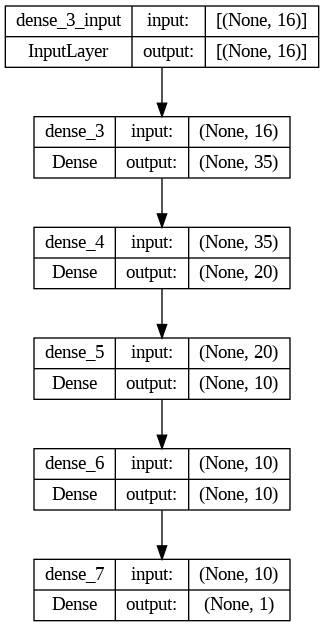

In [56]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [57]:
ann_viz(model, view = True, filename="/content/gdrive/MyDrive/425441/mlp_model")

In [33]:
pip install pdf2image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
from pdf2image import convert_from_path

In [35]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 174 kB of archives.
After this operation, 754 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 poppler-utils amd64 0.86.1-0ubuntu1.1 [174 kB]
Fetched 174 kB in 1s (226 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 128208 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.86.1-0ubuntu1.1_amd64.deb ...
Unpacking poppler-utils (0.86.1-0ubuntu1.1) ...
Setting up poppler-utils (0.86.1-0ubuntu1.1) ...
Processing triggers for man-db (2.9.1-1) ...


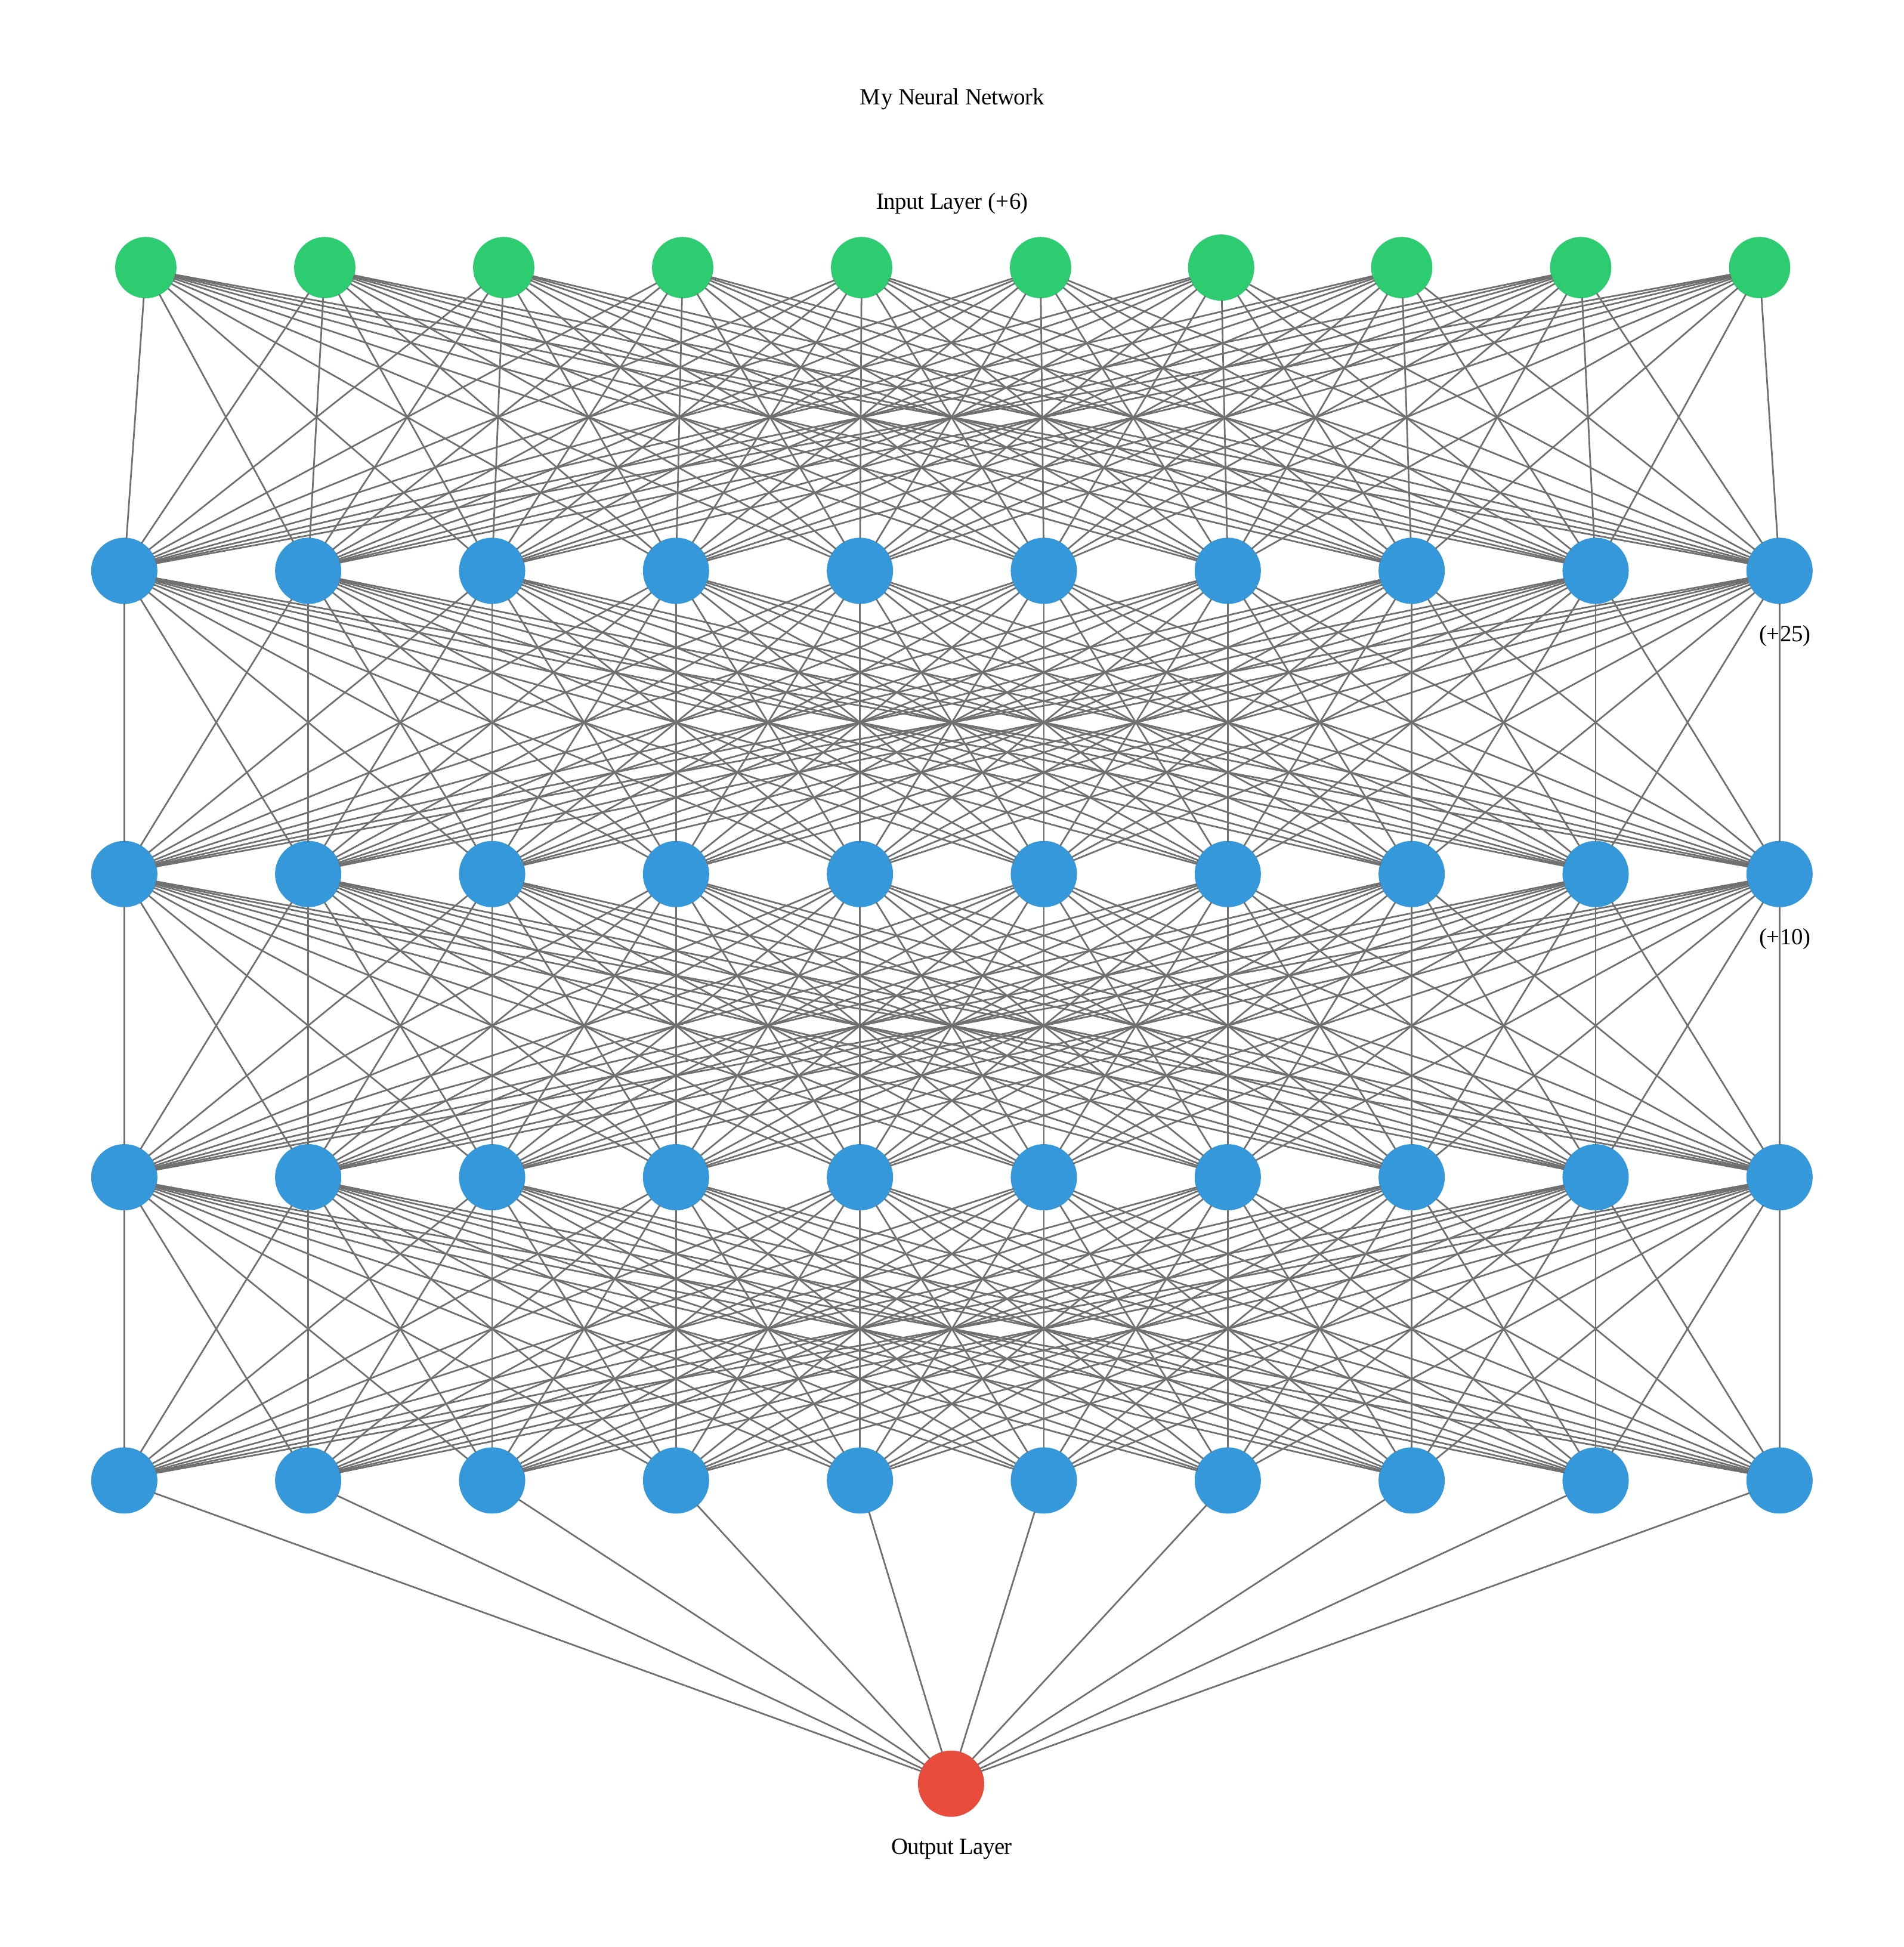

In [58]:
images = convert_from_path("/content/gdrive/MyDrive/425441/mlp_model.pdf")
images[0]